In [88]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scrapping data 

In [53]:
URL = "https://sites.google.com/site/britishmonarchyfamilyhistory/british-monarchs-and-their-prime-ministers"
page = requests.get(URL)

In [54]:
soup = BeautifulSoup(page.content, "html.parser")

In [55]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html itemscope="" itemtype="http://schema.org/WebPage" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="chrome=1" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">/* Copyright 2008 Google. */ (function() { /*

Copyright The Closure Library Authors.
SPDX-License-Identifier: Apache-2.0
*/
(function(){function e(g){this.t={};this.tick=function(h,k,f){this.t[h]=[void 0!=f?f:(new Date).getTime(),k];if(void 0==f)try{window.console.timeStamp("CSI/"+h)}catch(m){}};this.getStartTickTime=function(){return this.t.start[0]};this.tick("start",null,g)}var a;if(window.performance)var d=(a=window.performance.timing)&&a.responseStart;var l=0<d?new e(d):new e;window.jstiming={Timer:e,load:l};if(a){var b=a.navigationStart;0<b&&d>=b&&(window.jstiming.srt=d-b)}if(a){var c=window.jstiming.load;

In [56]:
all_p = soup.find_all('p')

In [57]:
all_b = []
for p in all_p:
    all_b.append(p.b)

In [60]:
all_b

[None,
 <b><font color="#9900ff">As</font></b>,
 None,
 <b><font color="#9900ff">After</font></b>,
 None,
 <b><font color="#9900ff">As</font></b>,
 None,
 <b><font color="#9900ff">At</font></b>,
 <b><font color="#9900ff"> </font></b>,
 <b><font color="#9900ff">Every</font></b>,
 None,
 <b><font color="#9900ff">Eleven</font></b>,
 None,
 <b><font color="#9900ff">One</font> </b>,
 None,
 <b><font color="#9900ff">One</font></b>,
 None,
 <b><font color="#9900ff">The</font></b>,
 None,
 <b><font color="#9900ff">William</font></b>,
 None,
 <b><font color="#9900ff">Margaret</font></b>,
 None,
 <b><font color="#9900ff">Winston</font> Churchill </b>,
 None,
 <b><font color="#9900ff">Stanley</font> Baldwin</b>,
 None,
 <b><font color="#9900ff">The</font></b>,
 None,
 <b><font color="#9900ff">The</font> </b>,
 None,
 <b><font color="#9900ff">The</font></b>,
 None,
 <b><font color="#9900ff">The</font></b>,
 None,
 <b><font color="#9900ff">Seventy</font></b>,
 None,
 None,
 <b><span style="font-siz

In [61]:
b

[<b style="background-color:rgb(153,0,255)">KING GEORGE I</b>,
 <b>Sir Robert Walpole</b>,
 <b style="background-color:rgb(153,0,255)">KING GEORGE II </b>,
 <b>Spencer Compton </b>,
 <b>Henry Pelham</b>,
 <b>Thomas Pelham</b>,
 <b>William Cavendish</b>,
 <b>Thomas Pelham</b>,
 <b style="background-color:rgb(153,0,255)">KING GEORGE III </b>,
 <b>John Stuart</b>,
 <b>George Grenville</b>,
 <b>Charles Watson - Wentworth</b>,
 <b>William Pitt, the Elder </b>,
 <b>Augustus Fitzroy</b>,
 <b>Fredrick North </b>,
 <b>Charles Watson - Wentworth</b>,
 <b>William Petty - Fitzmaurice </b>,
 <b>William Cavendish - Bentinck</b>,
 <b>William Pitt, the younger</b>,
 <b>Henry Addington</b>,
 <b>William Pitt, the younger</b>,
 <b>William Wyndham Grenville</b>,
 <b>William Cavendish - Bentinck </b>,
 <b>Spencer Perceval </b>,
 <b>Robert Banks Jenkinson</b>,
 <b style="background-color:rgb(153,0,255)">KING GEORGE IV </b>,
 <b>George Canning</b>,
 <b>Fredrick John Robinson</b>,
 <b>Arthur Wellesley</b>,
 <

In [58]:
b = []
for some_b in all_b:
    if(some_b!=None and some_b.font==None):
        b.append(some_b)

In [70]:
Ruler = []
temp = []
for item in b:
    if(item.has_attr('style')):
        if(len(temp)!=0):
            Ruler.append(temp)
            temp = []
            temp.append(item.get_text())
        else:
            temp.append(item.get_text())
    else:
        temp.append(item.get_text())
        

In [71]:
Ruler

[['KING GEORGE I', 'Sir Robert Walpole'],
 ['KING GEORGE II ',
  'Spencer Compton ',
  'Henry Pelham',
  'Thomas Pelham',
  'William Cavendish',
  'Thomas Pelham'],
 ['KING GEORGE III ',
  'John Stuart',
  'George Grenville',
  'Charles Watson - Wentworth',
  'William Pitt, the Elder ',
  'Augustus Fitzroy',
  'Fredrick North ',
  'Charles Watson - Wentworth',
  'William Petty - Fitzmaurice ',
  'William Cavendish - Bentinck',
  'William Pitt, the younger',
  'Henry Addington',
  'William Pitt, the younger',
  'William Wyndham Grenville',
  'William Cavendish - Bentinck ',
  'Spencer Perceval ',
  'Robert Banks Jenkinson'],
 ['KING GEORGE IV ',
  'George Canning',
  'Fredrick John Robinson',
  'Arthur Wellesley'],
 ['KING WILLIAM IV ',
  'Charles Grey ',
  'William Lamb',
  'Arthur Wellesley ',
  'Sir Robert Peel',
  'William Lamb'],
 ['QUEEN VICTORIA ',
  'Sir Robert Peel',
  'Lord John Russel',
  'Edward Smith - Stanley',
  'George Hamilton - Gordon ',
  'Henry John Temple ',
  'Edwa

In [72]:
Ruler = Ruler[:10]

In [73]:
Ruler[-1] = Ruler[-1][:-3]

In [74]:
Ruler

[['KING GEORGE I', 'Sir Robert Walpole'],
 ['KING GEORGE II ',
  'Spencer Compton ',
  'Henry Pelham',
  'Thomas Pelham',
  'William Cavendish',
  'Thomas Pelham'],
 ['KING GEORGE III ',
  'John Stuart',
  'George Grenville',
  'Charles Watson - Wentworth',
  'William Pitt, the Elder ',
  'Augustus Fitzroy',
  'Fredrick North ',
  'Charles Watson - Wentworth',
  'William Petty - Fitzmaurice ',
  'William Cavendish - Bentinck',
  'William Pitt, the younger',
  'Henry Addington',
  'William Pitt, the younger',
  'William Wyndham Grenville',
  'William Cavendish - Bentinck ',
  'Spencer Perceval ',
  'Robert Banks Jenkinson'],
 ['KING GEORGE IV ',
  'George Canning',
  'Fredrick John Robinson',
  'Arthur Wellesley'],
 ['KING WILLIAM IV ',
  'Charles Grey ',
  'William Lamb',
  'Arthur Wellesley ',
  'Sir Robert Peel',
  'William Lamb'],
 ['QUEEN VICTORIA ',
  'Sir Robert Peel',
  'Lord John Russel',
  'Edward Smith - Stanley',
  'George Hamilton - Gordon ',
  'Henry John Temple ',
  'Edwa

In [81]:
final_list = [{'ruler':ruler[0], 'pm':len(ruler)-1} for ruler in Ruler]

In [82]:
final_list

[{'ruler': 'KING GEORGE I', 'pm': 1},
 {'ruler': 'KING GEORGE II ', 'pm': 5},
 {'ruler': 'KING GEORGE III ', 'pm': 16},
 {'ruler': 'KING GEORGE IV ', 'pm': 3},
 {'ruler': 'KING WILLIAM IV ', 'pm': 5},
 {'ruler': 'QUEEN VICTORIA ', 'pm': 20},
 {'ruler': 'KING EDWARD VII ', 'pm': 4},
 {'ruler': 'KING GEORGE V ', 'pm': 7},
 {'ruler': 'KING GEORGE VI ', 'pm': 4},
 {'ruler': 'QUEEN ELISABETH II', 'pm': 15}]

In [85]:
df = pd.DataFrame(final_list)

In [86]:
df

,ruler,pm
0,KING GEORGE I,1
1,KING GEORGE II,5
2,KING GEORGE III,16
3,KING GEORGE IV,3
4,KING WILLIAM IV,5
5,QUEEN VICTORIA,20
6,KING EDWARD VII,4
7,KING GEORGE V,7
8,KING GEORGE VI,4
9,QUEEN ELISABETH II,15


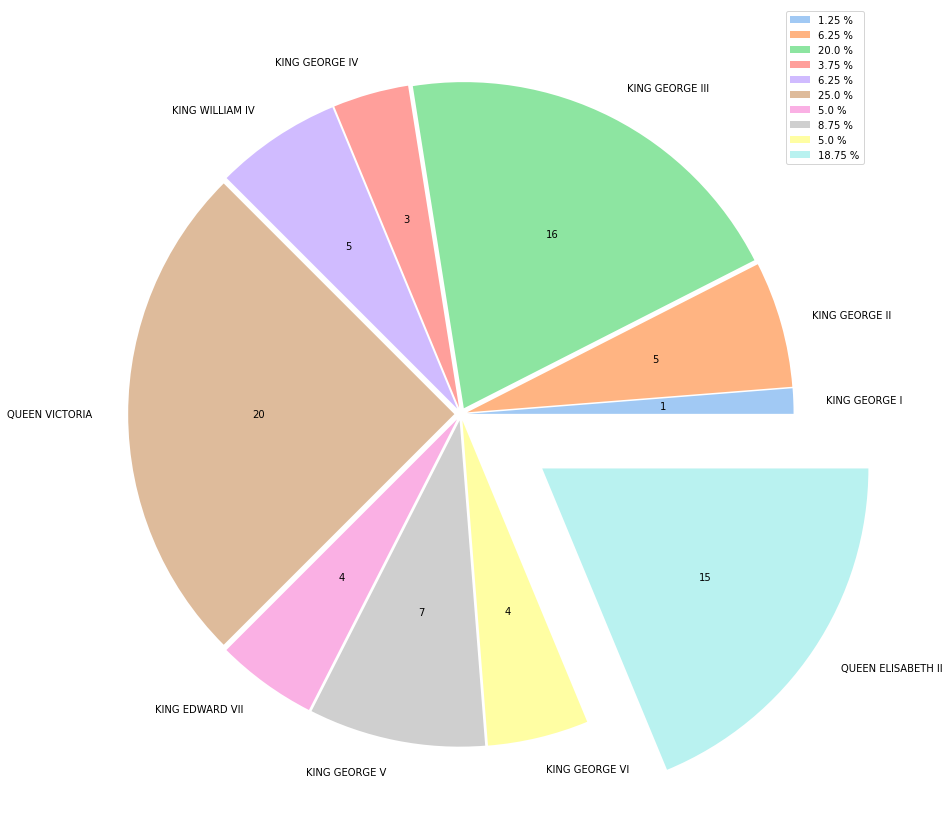

<Figure size 432x288 with 0 Axes>

In [119]:
data = df.pm
labels = df.ruler

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]
explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.3]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

perc = [f'{p/sum(df.pm)*100} %' for p in df.pm]
plt.figure(figsize=(15, 15))
plt.pie(df.pm, labels = labels, colors = colors, autopct=autopct_format(df.pm), explode=explode)

plt.legend(perc, loc='upper right')
plt.show()
plt.savefig('plot.png')

<Figure size 432x288 with 0 Axes>